In [22]:
import math
import random
import time
import heapq
import matplotlib.pyplot as plt

# a) Dijkstra's using an adjacency matrix and arrays

In [23]:
def dijkMatrix(graph, start):
    V = len(graph)
    dist = [math.inf] * V
    visited = [False] * V
    dist[start] = 0
    for i in range(V):
        u = -1
        min_dist = math.inf
        for v in range(V):
            if not visited[v] and dist[v] < min_dist:
                min_dist = dist[v]
                u = v
        if u == -1:
            break
        visited[u] = True
        for v in range(V):
            if graph[u][v] != math.inf and not visited[v]:
                if dist[u] + graph[u][v] < dist[v]:
                    dist[v] = dist[u] + graph[u][v]
    return dist

# b) Dijkstra's using adjacency lists and heap

In [24]:
def dijkList(graph, start):
    V = len(graph)
    dist = [math.inf] * V
    dist[start] = 0
    pq = [(0, start)]  

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:  
            continue
        for v, w in graph[u]:
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                heapq.heappush(pq, (dist[v], v))

    return dist

# Graph generation

In [25]:
def generate_dense_graph(V, maxW=10):
    graph = [[math.inf] * V for _ in range(V)]
    for i in range(V):
        for j in range(V):
            if i != j:
                graph[i][j] = random.randint(1, maxW)
    return graph

def generate_sparse_graph(V, E, maxW=10):
    graph = [[] for _ in range(V)]
    edges_added = 0
    while edges_added < E:
        u = random.randrange(V)
        v = random.randrange(V)
        if u != v:
            w = random.randint(1, maxW)
            graph[u].append((v, w))
            edges_added += 1
    return graph

# testing 

Testing V=20...
Testing V=40...
Testing V=60...
Testing V=80...
Testing V=100...


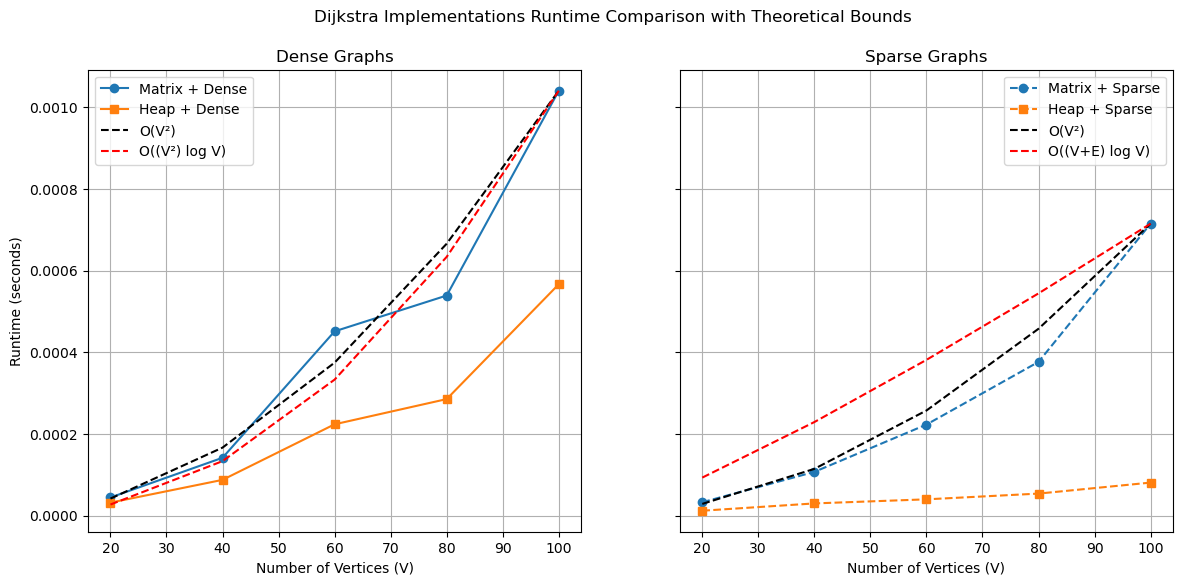

In [ ]:
def benchmark():
    sizes = [20, 40, 60, 80, 100]  
    times_dense_matrix = []
    times_sparse_matrix = []
    times_dense_heap = []
    times_sparse_heap = []

    for V in sizes:
        print(f"Testing V={V}...")

        # -------- Dense Graph --------
        dense_matrix = generate_dense_graph(V)
        dense_list = [[(j, dense_matrix[i][j]) for j in range(V) if i != j] for i in range(V)]

        # Matrix + Dense
        start = time.time()
        dijkMatrix(dense_matrix, 0)
        times_dense_matrix.append(time.time() - start)

        # Heap + Dense
        start = time.time()
        dijkList(dense_list, 0)
        times_dense_heap.append(time.time() - start)

        # -------- Sparse Graph --------
        E = 5 * V  # sparse graph: ~linear number of edges
        sparse_list = generate_sparse_graph(V, E)
        sparse_matrix = [[math.inf] * V for _ in range(V)]
        for u in range(V):
            for v, w in sparse_list[u]:
                sparse_matrix[u][v] = w

        # Matrix + Sparse
        start = time.time()
        dijkMatrix(sparse_matrix, 0)
        times_sparse_matrix.append(time.time() - start)

        # Heap + Sparse
        start = time.time()
        dijkList(sparse_list, 0)
        times_sparse_heap.append(time.time() - start)

    # -------- Theoretical curves --------
    import numpy as np
    V_vals = np.array(sizes)
    
    # For matrix: O(V^2)
    theo_matrix = V_vals**2
    # For heap: O((V+E) log V)
    theo_dense_heap = (V_vals**2) * np.log(V_vals)  # dense: E ~ V^2
    theo_sparse_heap = (V_vals * np.log(V_vals)) * 5  # sparse: E ~ 5V
    
    # Normalize to fit graph scale (divide by max, then multiply by max empirical)
    scale_dense = max(times_dense_matrix + times_dense_heap)
    scale_sparse = max(times_sparse_matrix + times_sparse_heap)

    theo_matrix_scaled_dense = theo_matrix / max(theo_matrix) * scale_dense
    theo_heap_scaled_dense = theo_dense_heap / max(theo_dense_heap) * scale_dense

    theo_matrix_scaled_sparse = theo_matrix / max(theo_matrix) * scale_sparse
    theo_heap_scaled_sparse = theo_sparse_heap / max(theo_sparse_heap) * scale_sparse

    # -------- Plot Results --------
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Dense subplot
    axes[0].plot(sizes, times_dense_matrix, "o-", label="Matrix + Dense")
    axes[0].plot(sizes, times_dense_heap, "s-", label="Heap + Dense")
    axes[0].plot(sizes, theo_matrix_scaled_dense, "k--", label="O(V²)")
    axes[0].plot(sizes, theo_heap_scaled_dense, "r--", label="O((V²) log V)")
    axes[0].set_title("Dense Graphs")
    axes[0].set_xlabel("Number of Vertices (V)")
    axes[0].set_ylabel("Runtime (seconds)")
    axes[0].grid(True)
    axes[0].legend()

    # Sparse subplot
    axes[1].plot(sizes, times_sparse_matrix, "o--", label="Matrix + Sparse")
    axes[1].plot(sizes, times_sparse_heap, "s--", label="Heap + Sparse")
    axes[1].plot(sizes, theo_matrix_scaled_sparse, "k--", label="O(V²)")
    axes[1].plot(sizes, theo_heap_scaled_sparse, "r--", label="O((V+E) log V)")
    axes[1].set_title("Sparse Graphs")
    axes[1].set_xlabel("Number of Vertices (V)")
    axes[1].grid(True)
    axes[1].legend()

    plt.suptitle("Dijkstra Implementations Runtime Comparison with Theoretical Bounds")
    plt.show()

benchmark()